In [3]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

In [4]:
def __add_noise(tgt_wav, add_wav, db):
    tgt_rms = np.sqrt(np.mean(np.square(tgt_wav), axis=-1))
    add_rms = np.sqrt(np.mean(np.square(add_wav), axis=-1))

    noise_rms = tgt_rms / (10**(float(db) / 20)) 
    new_wav = tgt_wav + add_wav * (noise_rms / (add_rms + 1e-6))
    new_wav = np.clip(new_wav, np.min(new_wav)*2, np.max(new_wav)*2)
    return new_wav

In [5]:
def Mixaudio(audio_path1,audio_path2):
    # Load an audio file
    samples1, sample_rate = librosa.load(audio_path1,sr=32000)
    samples2, sample_rate = librosa.load(audio_path2,sr=32000)
    min_len = min(len(samples1),len(samples2))
    samples1 = samples1[:min_len]
    samples2 = samples2[:min_len]
    db = np.random.randint(-30,20)
    samples = __add_noise(samples1,samples2,db=db)

    # Visualize the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(samples, sr=sample_rate)
    plt.title('Waveform')

    # Compute the spectrogram
    spectrogram = librosa.stft(samples)
    spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))


    # Visualize the mel spectrogram
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate,fmin=40,fmax=14000)

    # Visualize mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=16000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()

    display(Audio(samples, rate=sample_rate))
    plt.show()

In [55]:
def audio_eda(audio_path):
   
    # Load an audio file
    samples, sample_rate = librosa.load(audio_path)
    samples = samples[:10*sample_rate]
    # Visualize the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(samples, sr=sample_rate)
    plt.title('Waveform')

    # Compute the spectrogram
    spectrogram = librosa.stft(samples)

    # Visualize the spectrogram
    # plt.figure(figsize=(14, 5))
    # librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='log')
    # plt.colorbar(format='%+2.0f dB')
    # plt.title('Spectrogram (dB)')

    # Compute the mel spectrogram


    # Visualize the mel spectrogram
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate,fmin=40,fmax=14000)

    # Visualize mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=16000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    display(Audio(samples, rate=sample_rate))
    plt.show()

In [235]:
import pandas as pd
df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv11_ensemble.csv')
# filter night time

time = df['path'].apply(lambda x: int(x.split('_')[-2][0:2]))
is_night = time.apply(lambda x: 1 if x>=19 or x<6 else 0)
df = df[is_night==0]
bird_cols = df.columns[1:]

tbsfin1
0.4734943025


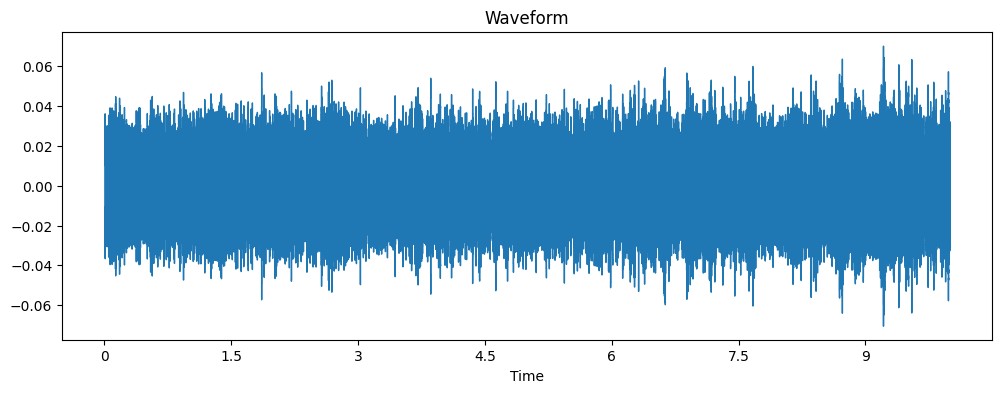

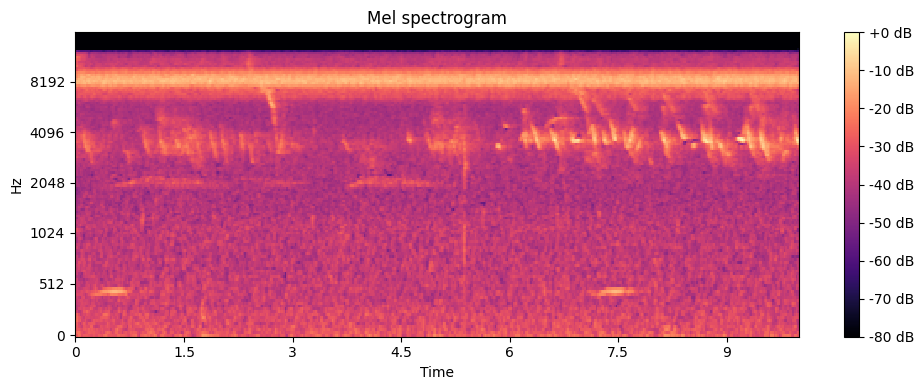

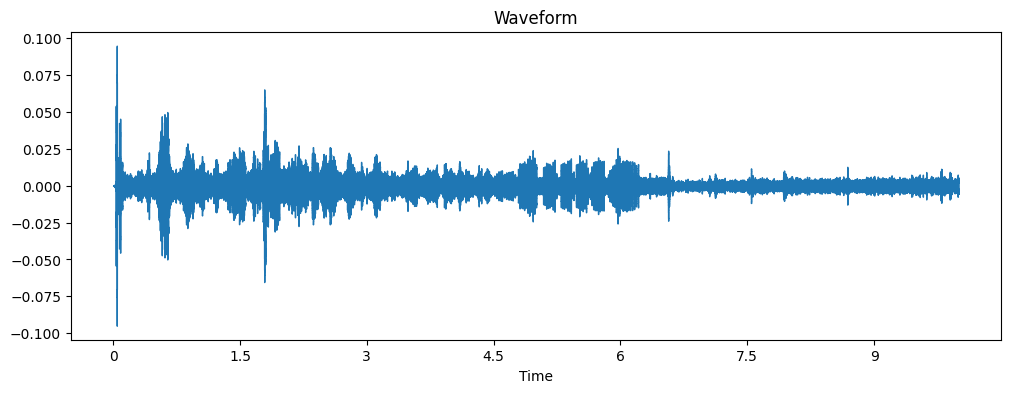

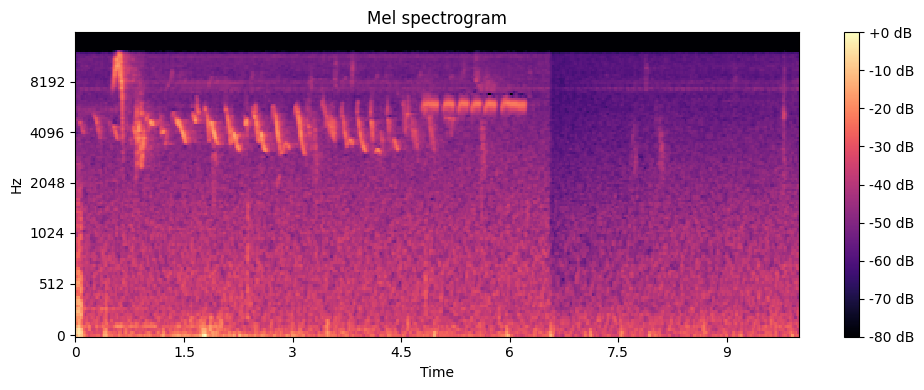

In [199]:
from glob import glob
path = '/root/projects/BirdClef2025/data/train_soundscapes_10s/H02_20230426_081000_20s.ogg'
index = df[df['path']==path][bird_cols].values.argmax()
max_value = df[df['path']==path][bird_cols].values.max()
print(bird_cols[index])
print(max_value)
# root_path = '/root/projects/BirdClef2025/data/train_soundscapes'
# path = root_path+'/O203_20230521_100000.ogg'
audio_eda(path)

speices = bird_cols[index]
train_path = f'/root/projects/BirdClef2025/data/train_audio/{speices}/*.ogg'
example_audio = glob(train_path)
idx = np.random.randint(0,len(example_audio)-1)
# # idx = 1
audio_eda(example_audio[idx])
# Mixaudio(path,example_audio[idx])